In [47]:
import pandas as pd

In [48]:
data_raw = pd.read_csv('sorting_results.csv')

In [49]:
data_raw.head(100)

,Iteration,NumElements,InsertionSortTime,MergeSortTime,HeapSortTime,QuickSortInPlaceTime,QuickSortModifiedTime
0,1,10,0,0,2,0,0
1,1,100,0,0,0,0,0
2,1,1000,6,0,0,1,2
3,1,1500,9,0,0,2,8
4,1,2000,19,0,1,3,3
...,...,...,...,...,...,...,...
95,5,30000,3584,7,23,47,47
96,5,35000,4855,8,27,54,63
97,5,40000,6362,10,32,62,62
98,5,45000,8269,11,36,71,71


In [50]:
unique_num_elements = data_raw['NumElements'].unique()

In [51]:
unique_num_elements

array([   10,   100,  1000,  1500,  2000,  2500,  4000,  4500,  5000,
        7500, 10000, 12500, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000], dtype=int64)

In [52]:
len(unique_num_elements)

20

In [53]:
avg_data_rows = []
for u_elem in unique_num_elements:
    data = [u_elem]
    filtered_rows = data_raw[data_raw['NumElements'] == u_elem]
    data.append(filtered_rows['InsertionSortTime'].mean())
    data.append(filtered_rows['MergeSortTime'].mean())
    data.append(filtered_rows['HeapSortTime'].mean())
    data.append(filtered_rows['QuickSortInPlaceTime'].mean())
    data.append(filtered_rows['QuickSortModifiedTime'].mean())
    avg_data_rows.append(data)
print(avg_data_rows)

[[10, 0.0, 0.0, 0.4, 0.0, 0.0], [100, 0.0, 0.0, 0.0, 0.0, 0.0], [1000, 4.4, 0.0, 0.0, 1.0, 1.2], [1500, 9.6, 0.0, 0.0, 2.8, 3.6], [2000, 17.0, 0.0, 1.0, 3.0, 3.0], [2500, 25.2, 0.0, 1.0, 4.0, 4.0], [4000, 63.8, 0.0, 2.0, 6.0, 6.2], [4500, 81.0, 1.0, 2.0, 7.0, 7.0], [5000, 101.0, 1.0, 3.8, 10.0, 9.6], [7500, 225.8, 1.0, 5.0, 12.2, 14.2], [10000, 397.0, 2.0, 6.6, 16.8, 16.0], [12500, 622.0, 3.0, 9.8, 20.0, 20.0], [15000, 890.2, 3.0, 10.6, 24.0, 24.4], [20000, 1593.2, 5.4, 14.8, 31.4, 31.2], [25000, 2516.8, 6.0, 19.0, 39.2, 40.4], [30000, 3597.0, 7.0, 22.8, 46.8, 47.0], [35000, 4883.8, 8.2, 27.2, 56.2, 58.2], [40000, 6369.6, 10.0, 32.4, 61.8, 62.0], [45000, 8073.0, 11.6, 36.2, 70.2, 70.2], [50000, 9918.4, 12.6, 42.2, 78.2, 78.6]]


In [54]:
data_avg = pd.DataFrame(avg_data_rows, columns=['NumElements', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'Quick Sort In Place', 'Quick Sort Modified'])

In [55]:
data_avg.head(20)

,NumElements,Insertion Sort,Merge Sort,Heap Sort,Quick Sort In Place,Quick Sort Modified
0,10,0.0,0.0,0.4,0.0,0.0
1,100,0.0,0.0,0.0,0.0,0.0
2,1000,4.4,0.0,0.0,1.0,1.2
3,1500,9.6,0.0,0.0,2.8,3.6
4,2000,17.0,0.0,1.0,3.0,3.0
5,2500,25.2,0.0,1.0,4.0,4.0
6,4000,63.8,0.0,2.0,6.0,6.2
7,4500,81.0,1.0,2.0,7.0,7.0
8,5000,101.0,1.0,3.8,10.0,9.6
9,7500,225.8,1.0,5.0,12.2,14.2


In [67]:
data_for_vis = []
for col in data_avg:
    if col is not 'NumElements':
        for index, val in enumerate(data_avg[col]):
            data_for_vis.append([unique_num_elements[index], val, col])
data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
data_finalized.head(25)

,Number of Elements,Average Time (ms),Sort
0,10,0.0,Insertion Sort
1,100,0.0,Insertion Sort
2,1000,4.4,Insertion Sort
3,1500,9.6,Insertion Sort
4,2000,17.0,Insertion Sort
5,2500,25.2,Insertion Sort
6,4000,63.8,Insertion Sort
7,4500,81.0,Insertion Sort
8,5000,101.0,Insertion Sort
9,7500,225.8,Insertion Sort


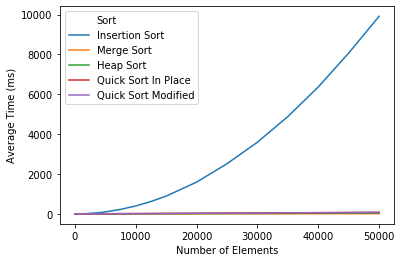

In [74]:
sns.lineplot(data=data_finalized, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [77]:
data_no_insertion = data_finalized[data_finalized['Sort'] != 'Insertion Sort']

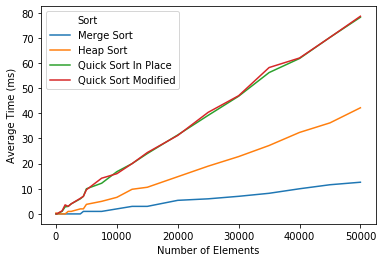

In [78]:
sns.lineplot(data=data_no_insertion, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [79]:
data_less_than_ten_thousand = data_finalized[data_finalized['Number of Elements'] <= 10_000]

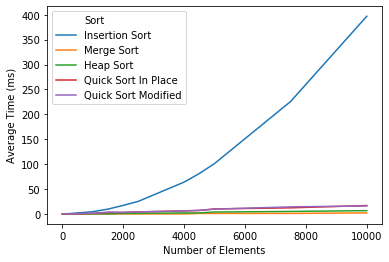

In [80]:
sns.lineplot(data=data_less_than_ten_thousand, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [83]:
data_less_than_twentyfive_thousand = data_finalized[data_finalized['Number of Elements'] <= 2500]

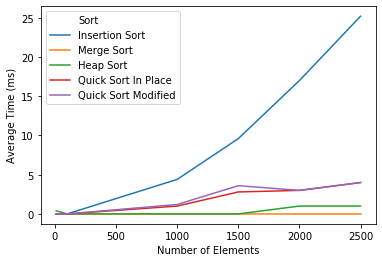

In [84]:
sns.lineplot(data=data_less_than_twentyfive_thousand, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [97]:
def print_sort_chart(data, max_elements=50000):
    unique_num_elements = data_raw['NumElements'].unique()
    avg_data_rows = []
    for u_elem in unique_num_elements:
        data = [u_elem]
        filtered_rows = data_raw[data_raw['NumElements'] == u_elem]
        data.append(filtered_rows['InsertionSortTime'].mean())
        data.append(filtered_rows['MergeSortTime'].mean())
        data.append(filtered_rows['HeapSortTime'].mean())
        data.append(filtered_rows['QuickSortInPlaceTime'].mean())
        data.append(filtered_rows['QuickSortModifiedTime'].mean())
        avg_data_rows.append(data)
    data_avg = pd.DataFrame(avg_data_rows, columns=['NumElements', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'Quick Sort In Place', 'Quick Sort Modified'])
    data_for_vis = []
    for col in data_avg:
        if col is not 'NumElements':
            for index, val in enumerate(data_avg[col]):
                data_for_vis.append([unique_num_elements[index], val, col])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_for_vis = []
    for col in data_avg:
        if col is not 'NumElements':
            for index, val in enumerate(data_avg[col]):
                data_for_vis.append([unique_num_elements[index], val, col])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_filtered = data_finalized[data_finalized['Number of Elements'] <= max_elements]
    sns.lineplot(data=data_filtered, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [98]:
data_raw = pd.read_csv('sorting_results.csv')

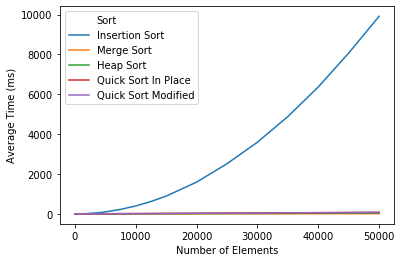

In [99]:
print_sort_chart(data_raw)

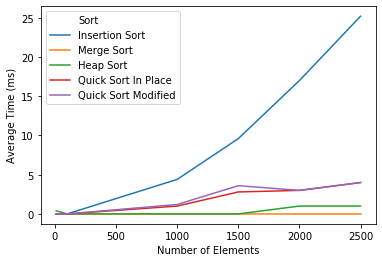

In [101]:
print_sort_chart(data_raw, 2500)